Iris Dataset Analysis with Pandas, Matplotlib, and Seaborn

Objective: 
- Load and analyze the Iris dataset.  
- Perform data exploration, cleaning, and descriptive statistics.  
- Create visualizations to identify patterns and relationships.  
- Apply error handling for robustness.  

Dataset Source: UCI / Kaggle Iris Dataset.  


In [15]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# Load Dataset with Error Handling
try:
    df = pd.read_csv("Iris.csv")
    print("File loaded successfully!\n")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    df = None


File loaded successfully!



In [17]:
# Dataset Preview & Info
if df is not None:
    # Preview dataset
    display(df.head())

    # Structure of dataset
    print("\n🔹 Dataset Info:")
    print(df.info())

    # Missing values
    print("\n🔹 Missing values per column:")
    print(df.isnull().sum())


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

🔹 Missing values per column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [18]:
# Data Type Conversion & Cleaning
# Ensure correct data types
numeric_columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

for col in numeric_columns:
    try:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    except Exception as e:
        print(f"Error converting {col}: {e}")

# Drop missing values if any
df = df.dropna()

print("\nData types after conversion:")
print(df.dtypes)



Data types after conversion:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [19]:
# Basic Statistics & Grouping
# Descriptive statistics
print("Basic Statistics:")
display(df.describe())

# Group by species
print("\nMean values grouped by Species:")
display(df.groupby("Species").mean(numeric_only=True))



Basic Statistics:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



Mean values grouped by Species:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


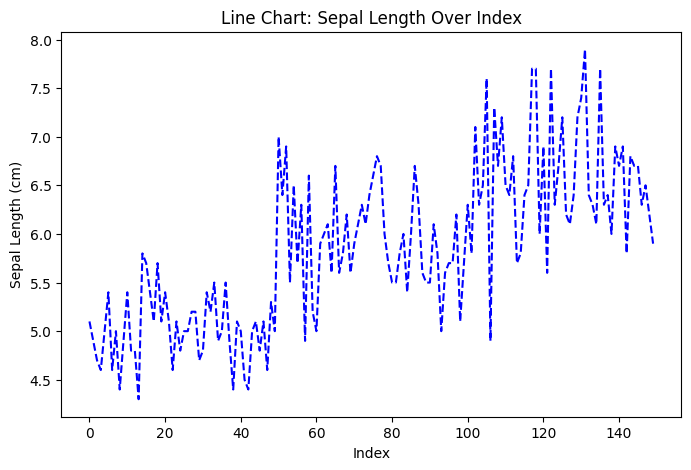

In [20]:
# Line Chart
plt.figure(figsize=(8, 5))
plt.plot(df.index, df["SepalLengthCm"], color="blue", linestyle="--")
plt.xlabel("Index")
plt.ylabel("Sepal Length (cm)")
plt.title("Line Chart: Sepal Length Over Index")
plt.show()



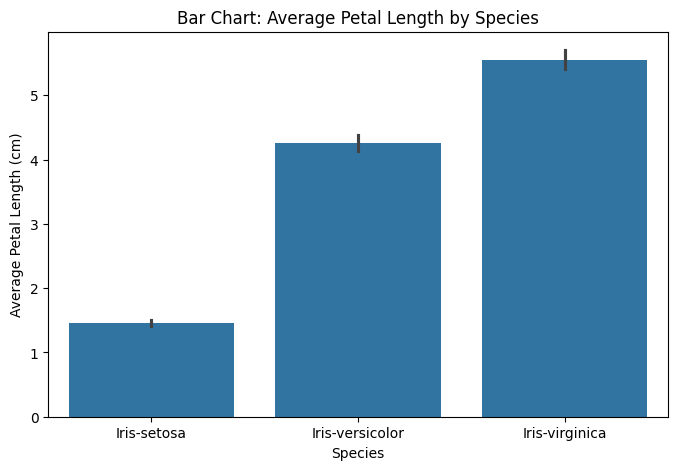

In [21]:
#Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x="Species", y="PetalLengthCm", data=df, estimator="mean")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.title("Bar Chart: Average Petal Length by Species")
plt.show()


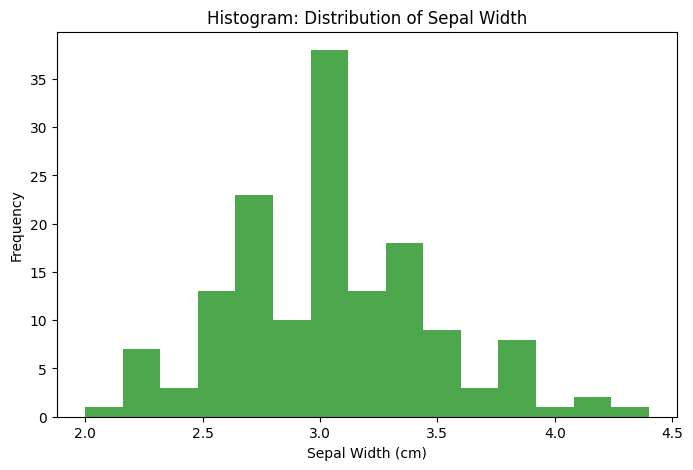

In [22]:
# Histogram
plt.figure(figsize=(8, 5))
plt.hist(df["SepalWidthCm"], bins=15, color="green", alpha=0.7)
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.title("Histogram: Distribution of Sepal Width")
plt.show()


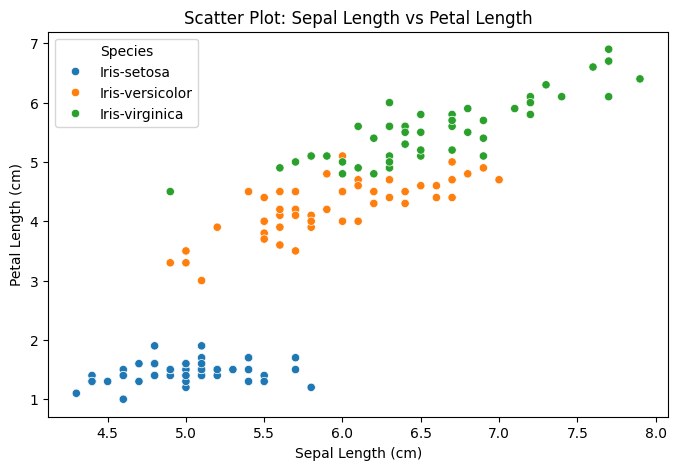

In [23]:
# Scatter Plot with Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x="SepalLengthCm", y="PetalLengthCm", hue="Species", data=df)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.legend(title="Species")
plt.show()



#  Findings / Observations

- Iris-setosa generally has the smallest petal and sepal sizes.  
- Iris-virginica tends to have the largest petal dimensions.  
- Sepal Length and Petal Length show a positive correlation.  
- The dataset is clean with no missing values after checks.  
